In [1]:
#upload the CSV file to the platform

from google.colab import files
dataset = files.upload()

Saving heart_statlog_cleveland_hungary_final.csv to heart_statlog_cleveland_hungary_final.csv


In [2]:
#parse the CSV dataset into the Platform

import pandas as pd
file_path = "heart_statlog_cleveland_hungary_final.csv"
df = pd.read_csv(file_path)

In [3]:
#check that the dataset was loaded properly, and that no values within the dataset are "Null"

df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [4]:
#check for duplicate rows
df.duplicated().sum()

df = df.drop_duplicates()

df.duplicated().sum()

0

In [5]:
#remove rows with cholesterol as "0"
df = df[df['cholesterol'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  746 non-null    int64  
 1   sex                  746 non-null    int64  
 2   chest pain type      746 non-null    int64  
 3   resting bp s         746 non-null    int64  
 4   cholesterol          746 non-null    int64  
 5   fasting blood sugar  746 non-null    int64  
 6   resting ecg          746 non-null    int64  
 7   max heart rate       746 non-null    int64  
 8   exercise angina      746 non-null    int64  
 9   oldpeak              746 non-null    float64
 10  ST slope             746 non-null    int64  
 11  target               746 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 75.8 KB


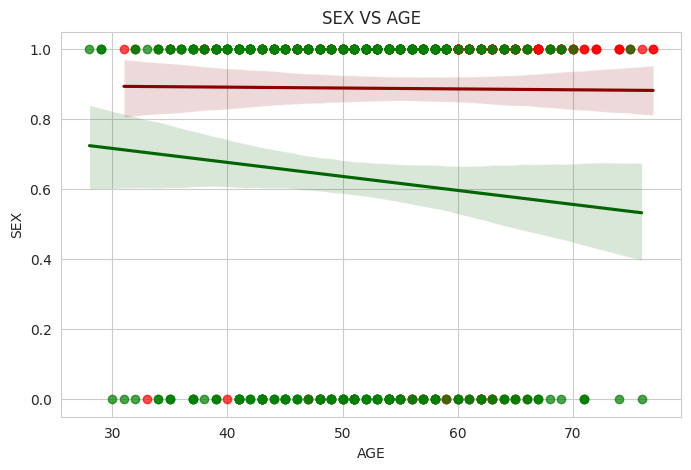

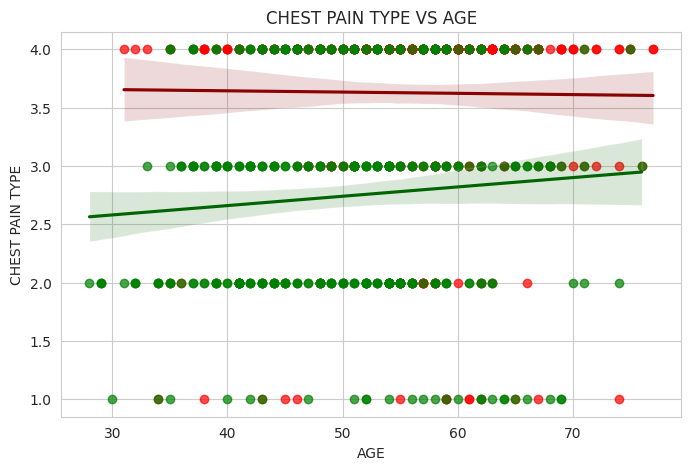

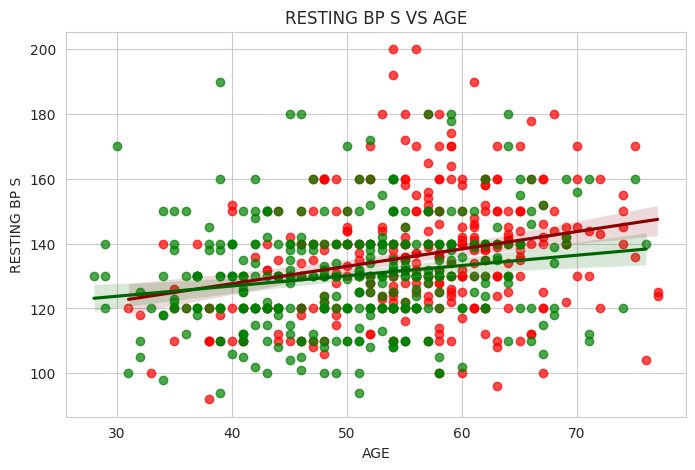

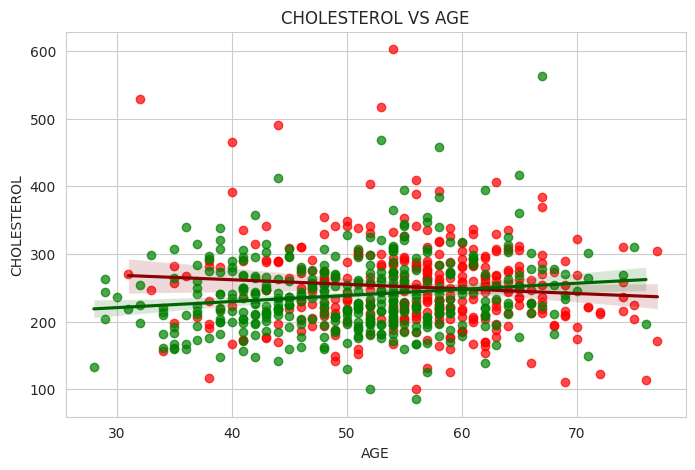

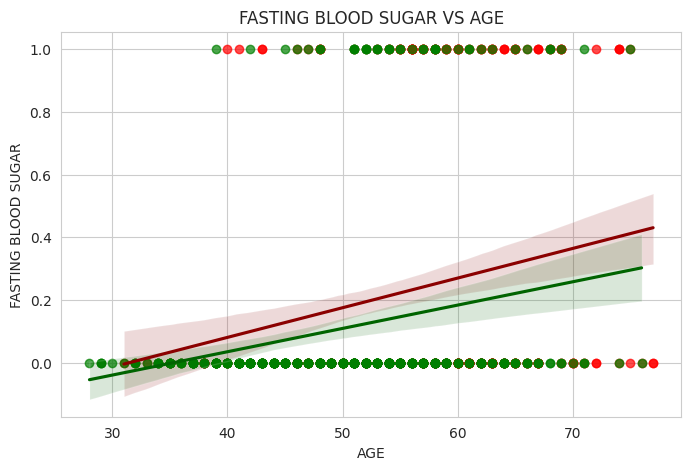

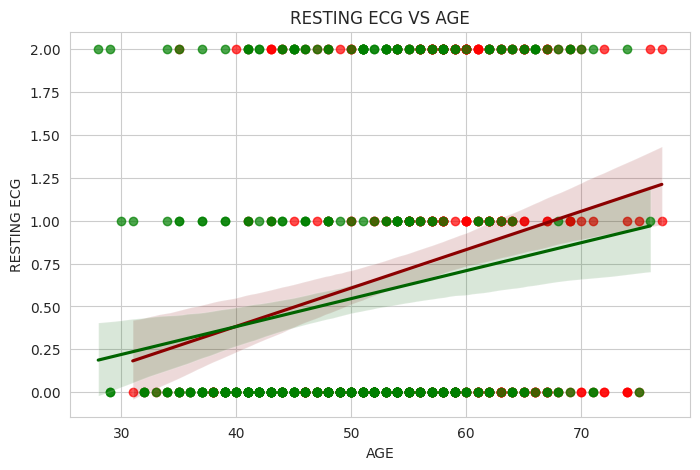

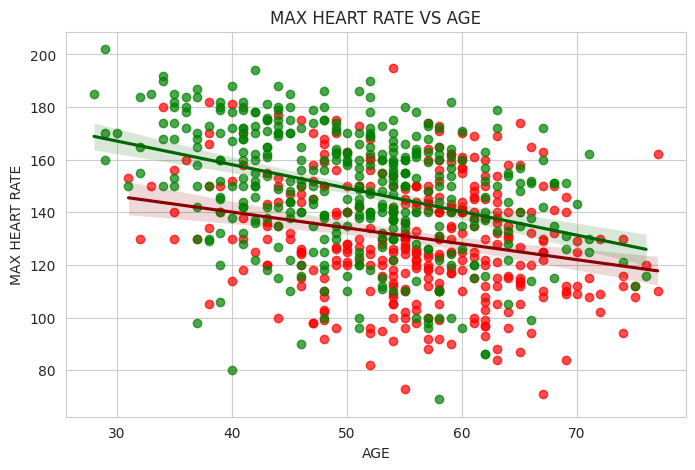

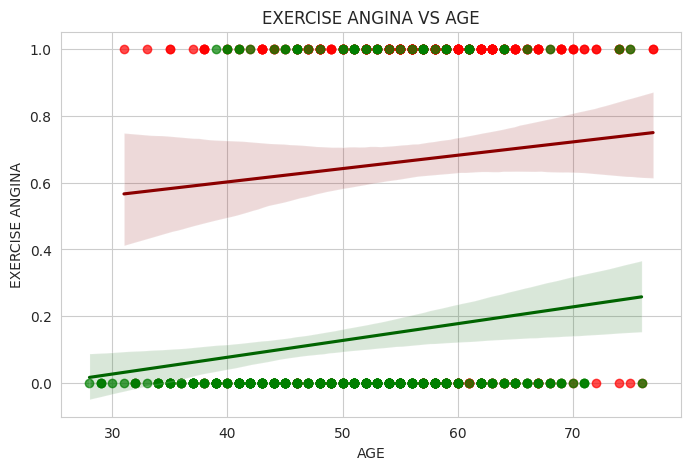

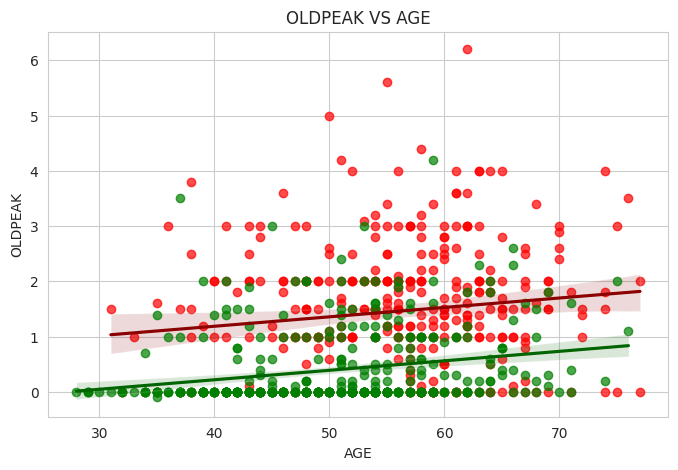

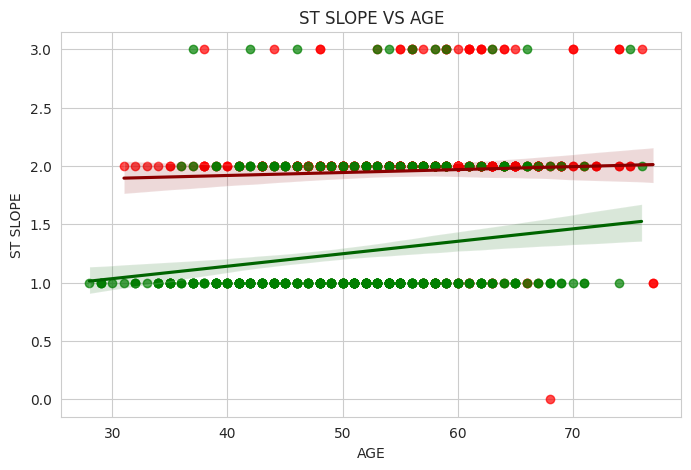

In [6]:
# Basic code to visualize the data set on a scatterplot with a line of best-fit for linear regression

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
data_dict = {}

for col in df.columns:
  if col != "age" and col != "target":
    data_dict[col] = df[["age", col, "target"]]

def plot_feature(feature):
  if feature in data_dict:
    df = data_dict[col]
    cvd_data = df[df["target"] == 1]
    non_cvd_data = df[df["target"] == 0]

    fig, ax = plt.subplots(figsize=(8,5))
    sns.regplot(x=cvd_data["age"], y=cvd_data[col], scatter_kws={"alpha":0.7, "color": "red", "label": "CVD"}, line_kws={"color": "darkred"}, ax=ax)
    sns.regplot(x=non_cvd_data["age"], y=non_cvd_data[col], scatter_kws={"alpha":0.7, "color": "green", "label": "NO CVD"}, line_kws={"color": "darkgreen"}, ax=ax)
    ax.set_xlabel("AGE")
    ax.set_ylabel(feature.upper())
    ax.set_title(f"{feature.upper()} VS AGE")
    plt.show()
  else:
    print(f"{feature} not found in the dataset.")

for col in df.columns:
  if col != "age" and col != "target":
    plot_feature(col)

In [7]:
#process the data and set up the basic Random Forest Model. The parameters will be tuned later.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

#define the target and features
target_col = "target"
feature_cols = [col for col in df.columns if col != "target"]

#standardize the feature values
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

#split the dataset into training sets and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df[feature_cols], df[target_col], test_size = 0.2, random_state=42)

#create the RandomForestClassifier and train on the training set
rf_model = RandomForestClassifier(n_estimators=125, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=125, random_state=42)

In [8]:
#initial testing of the basic Random Forest model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#make predictions on testing dataset
print(X_test)
y_pred = rf_model.predict(X_test)

#classification report
print("\nClassification Report:\n", classification_report(Y_test, y_pred))


          age       sex  chest pain type  resting bp s  cholesterol  \
209 -2.619296  0.568063        -1.218654     -0.175019    -1.905397   
260  0.222955 -1.760370        -1.218654     -0.638219     1.274906   
97  -1.461342  0.568063        -0.171285      1.561980    -1.651650   
148 -0.303388  0.568063        -1.218654     -0.754019    -1.296403   
568  1.907251  0.568063         0.876083     -0.175019    -0.399828   
..        ...       ...              ...           ...          ...   
728 -1.250805  0.568063        -1.218654     -1.333019    -0.162997   
69  -0.934999  0.568063         0.876083      0.982980     2.831224   
696  0.328223  0.568063        -1.218654     -0.754019    -0.146081   
131 -0.724462  0.568063         0.876083     -1.333019    -0.721242   
44  -1.040268  0.568063         0.876083     -0.754019    -1.177987   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
209            -0.448652     1.623418        1.826917        -0.790742   

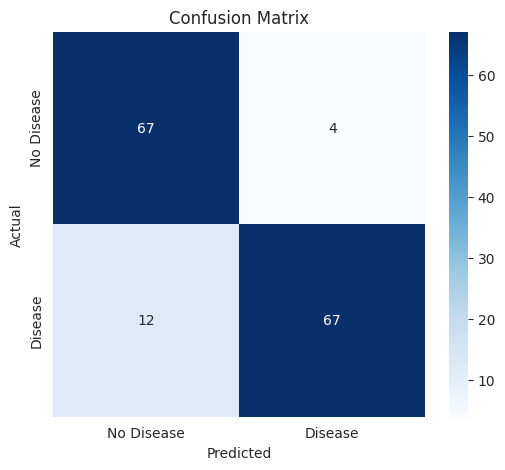

In [9]:
# Creation of a confusion matrix to visual the rate of False Negatives and False Positives

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [10]:
#check the importance of each feature

import numpy as np

#get feature importances
importances = rf_model.feature_importances_

#automatically get the top 50% of features based on importance
num_selected_features = int(0.5 * len(importances))

#get the indices of the top features
top_indices = np.argsort(importances)[::-1][:num_selected_features]

#select the columns that correspond to the most important features
selected_features = X_train.columns[top_indices]
X_selected_train = X_train[selected_features]

selective_rf_model = RandomForestClassifier(n_estimators=125, random_state=42)
selective_rf_model.fit(X_selected_train, Y_train)


RandomForestClassifier(n_estimators=125, random_state=42)

In [11]:
#testing of the selective RF model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#make predictions on testing dataset
y_pred = selective_rf_model.predict(X_test[selected_features])

#classification report
print("\nClassification Report:\n", classification_report(Y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        71
           1       0.88      0.77      0.82        79

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



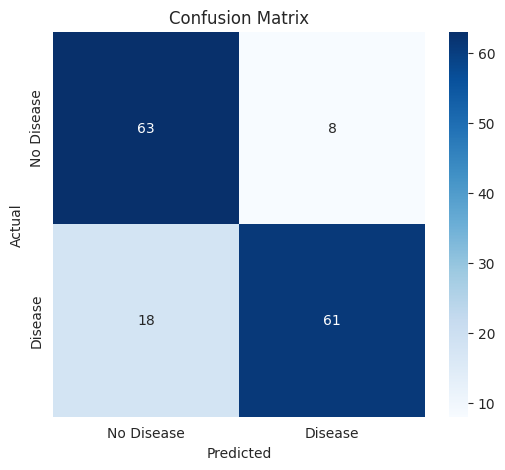

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Tuning the hyperparameters of the Random Forest model to find one that is the most accurate. Will print out the classification report of the most accurate one

from sklearn.model_selection import GridSearchCV

# Define a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid with incremental values
param_grid = {
    'n_estimators': [100, 200, 300, 400],               # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],                    # Depth of the trees (None = nodes expand until all leaves are pure)
    'min_samples_split': [2, 5, 10],                     # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                       # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']             # The number of features to consider at each split
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Get the best model and its parameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# Evaluate the best model
y_pred = best_rf_model.predict(X_test)

# Detailed classification report for the fine-tuned Random Forest Model
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        71
           1       0.94      0.86      0.90        79

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



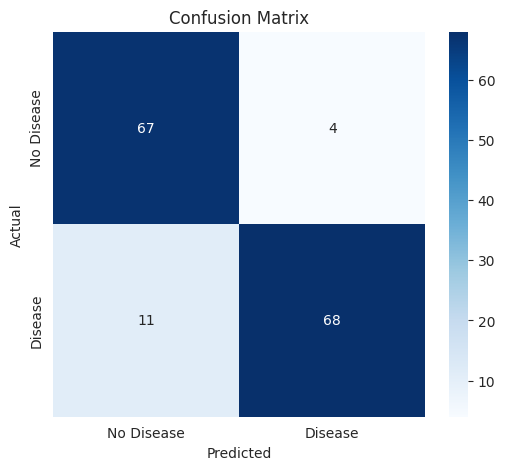

In [ ]:
# Creation of a confusion matrix to visual the rate of False Negatives and False Positives

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#generate test user input and feed it to the model to predict probability of heart disease

import numpy as np

#user known to have CVDmar
user_input = {
    "age": 49,
    "sex": 0,
    "chest pain type": 3,
    "resting bp s": 160,
    "cholesterol": 180,
    "fasting blood sugar": 10,
    "resting ecg": 0,
    "max heart rate": 156,
    "exercise angina": 0,
    "oldpeak": 1,
    "ST slope": 2
}

user_input_array = np.array([[user_input["age"], user_input["sex"], user_input["chest pain type"], user_input["resting bp s"], user_input["cholesterol"], user_input["fasting blood sugar"], user_input["resting ecg"], user_input["max heart rate"], user_input["exercise angina"], user_input["oldpeak"], user_input["ST slope"]]])

probability = best_rf_model.predict_proba(user_input_array)

print(probability[0][1]*100)


66.7792207792208


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#export the model for usage in other applications
import joblib

df.to_csv("cleaned_data.csv", index=False)

joblib.dump(best_rf_model, "heart_disease_predictor_model_rf.pkl")

files.download("heart_disease_predictor_model_rf.pkl")
files.download("cleaned_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>